In [4]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

print (sklearn.__version__)
print (pd.__version__)


0.20.0
0.23.4


In [8]:
DATA_DIR = '../data'

df = pd.read_table(
                    os.path.abspath(os.path.join(DATA_DIR,'H:\SELF\Yashu\Book1.csv')), 
                    sep=',', 
                    header=0, 
                  )
df.head(5)

,Unnamed: 0,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,0,Henry,A,Y,90,85,Yes
1,1,John,C,N,85,51,Yes
2,2,David,F,N,10,17,No
3,3,Holmes,B,Y,75,71,No
4,4,Marvin,E,N,20,30,No


In [10]:
print (df['ResearchScore'].map(lambda x: np.isnan(x)).unique())
print (df['ProjectScore'].map(lambda x: np.isnan(x)).unique())

[False]
[False]


In [17]:
X = df.iloc[:,4:5].values
Y = df.iloc[:,4].values

In [18]:
def data_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 10)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = data_split(X, Y)

In [19]:
print (X_train.shape, X_test.shape)

(6, 1) (2, 1)


In [20]:
#Regression Functionality
class Regression:
    
    def __init__(self):
        self.regressor = LinearRegression()
    
    def train(self, X_train, Y_train):
        model = self.regressor.fit(X_train, Y_train)
        return model

    def predict(self, model, X_test):
        return model.predict(X_test)

In [21]:
regress = Regression()
model = regress.train(X_train, Y_train)
predictions = regress.predict(model, X_test)

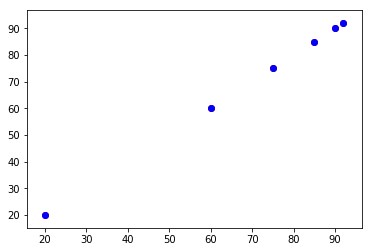

In [22]:
#Visualize
plt.scatter(X_train , Y_train, color = 'red')
plt.scatter(X_train , model.predict(X_train), color ='blue')

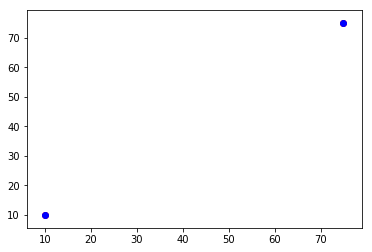

In [23]:
plt.scatter(X_test , Y_test, color = 'red')
plt.scatter(X_test , predictions, color ='blue')